In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widthse
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [3]:
data1 = np.genfromtxt("data/reactionRateData6/rate_3/avg_auto_corr.csv", delimiter=',')
data2 = np.genfromtxt("data/reactionRateData6/rate_4/avg_auto_corr.csv", delimiter=',')
data3 = np.genfromtxt("data/reactionRateData6/rate_5/avg_auto_corr.csv", delimiter=',')
data4 = np.genfromtxt("data/reactionRateData6/rate_6/avg_auto_corr.csv", delimiter=',')

In [4]:
data1.shape

(512, 511)

In [5]:
r = range(511)

In [46]:
k = 80

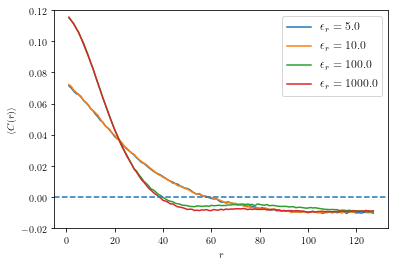

In [76]:
#data1[k, 0] = np.nan
#data2[k, 0] = np.nan
#data3[k, 0] = np.nan
#data4[k, 0] = np.nan

fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r[0:128], data1[k,0:128], label=r'$\epsilon_r=5.0$')
ax1.plot(r[0:128], data2[k,0:128], label=r'$\epsilon_r=10.0$')
ax1.plot(r[0:128], data3[k,0:128], label=r'$\epsilon_r=100.0$')
ax1.plot(r[0:128], data4[k,0:128], label=r'$\epsilon_r=1000.0$')
ax1.axhline(0.0, linestyle='--')
ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\langle C(r)\rangle$')
ax1.set_ylim(bottom=-0.02, top=0.12)
ax1.legend(fontsize='large')

In [48]:
w = fftfreq(256)

In [74]:
F1 = np.abs(fft(data1[k, 0:256])) * 2 / 256
F2 = np.abs(fft(data2[k, 0:256])) * 2 / 256
F3 = np.abs(fft(data3[k, 0:256])) * 2 / 256
F4 = np.abs(fft(data4[k, 0:256])) * 2 / 256

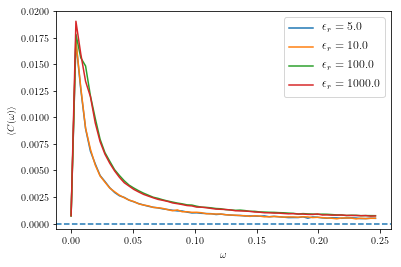

In [63]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(w[0:64], F1[0:64], label=r'$\epsilon_r=5.0$')
ax2.plot(w[0:64], F2[0:64], label=r'$\epsilon_r=10.0$')
ax2.plot(w[0:64], F3[0:64], label=r'$\epsilon_r=100.0$')
ax2.plot(w[0:64], F4[0:64], label=r'$\epsilon_r=1000.0$')
ax2.axhline(0.0, linestyle='--')
ax2.set_xlabel(r'$\omega$')
ax2.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax2.set_ylim(bottom=-0.02, top=0.12)
ax2.legend(fontsize='large')

In [64]:
G1 = (F1 - (np.max(F1) / 2))[0:128]
argmax1 = np.argmax(G1)
spline1 = spInt.InterpolatedUnivariateSpline(w[0:128], G1)
roots1 = spline1.roots()
G2 = (F2 - (np.max(F2) / 2))[0:128]
argmax2 = np.argmax(G2)
spline2 = spInt.InterpolatedUnivariateSpline(w[0:128], G2)
roots2 = spline2.roots()
G3 = (F3 - (np.max(F3) / 2))[0:128]
argmax3 = np.argmax(G3)
spline3 = spInt.InterpolatedUnivariateSpline(w[0:128], G3)
roots3 = spline3.roots()
G4 = (F4 - (np.max(F4) / 2))[0:128]
argmax4 = np.argmax(G4)
spline4 = spInt.InterpolatedUnivariateSpline(w[0:128], G4)
roots4 = spline4.roots()

In [65]:
print(roots1[-1])
print(roots2[-1])
print(roots3[-1])
print(roots4[-1])

0.01231223056726204
0.01232182694395295
0.02145217094086742
0.019444006222271278


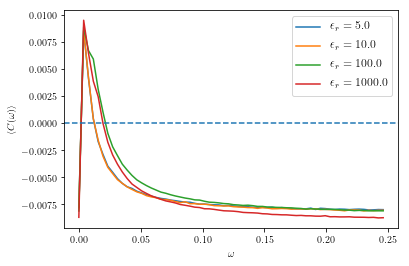

In [66]:
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(w[0:64], G1[0:64], label=r'$\epsilon_r=5.0$')
ax3.plot(w[0:64], G2[0:64], label=r'$\epsilon_r=10.0$')
ax3.plot(w[0:64], G3[0:64], label=r'$\epsilon_r=100.0$')
ax3.plot(w[0:64], G4[0:64], label=r'$\epsilon_r=1000.0$')
ax3.axhline(0.0, linestyle='--')
ax3.set_xlabel(r'$\omega$')
ax3.set_ylabel(r'$\langle C(\omega)\rangle$')
#ax2.set_ylim(bottom=-0.02, top=0.12)
ax3.legend(fontsize='large')

In [67]:
try:
    HWL1 = roots1[-2]
    HWR1 = roots1[-1]
    for j in range(roots1.shape[-1] - 1):
        if roots1[j] < w[argmax1] and roots1[j+1] > w[argmax1]:
            HWL1 = roots1[j]
            HWR1 = roots1[j + 1]
    FW1 = HWR1 - HWL1
except IndexError:
    FW1 = np.nan

try:
    HWL2 = roots2[-2]
    HWR2 = roots2[-1]
    for j in range(roots2.shape[-1] - 1):
        if roots2[j] < w[argmax2] and roots2[j+1] > w[argmax2]:
            HWL2 = roots2[j]
            HWR2 = roots2[j + 1]
    FW2 = HWR2 - HWL2
except IndexError:
    FW2 = np.nan
    
try:
    HWL3 = roots3[-2]
    HWR3 = roots3[-1]
    for j in range(roots3.shape[-1] - 1):
        if roots3[j] < w[argmax3] and roots3[j+1] > w[argmax3]:
            HWL3 = roots3[j]
            HWR3 = roots3[j + 1]
    FW3 = HWR3 - HWL3
except IndexError:
    FW3 = np.nan

try:
    HWL4 = roots4[-2]
    HWR4 = roots4[-1]
    for j in range(roots4.shape[-1] - 1):
        if roots4[j] < w[argmax4] and roots4[j+1] > w[argmax4]:
            HWL4 = roots4[j]
            HWR4 = roots4[j + 1]
    FW4 = HWR4 - HWL4
except IndexError:
    FW4 = np.nan

In [68]:
FW3

0.020382638050725033

In [69]:
L_1 = 1/FW1
L_2 = 1/FW2
L_3 = 1/FW3
L_4 = 1/FW4

In [70]:
max1 = np.max(F1)
max2 = np.max(F2)
max3 = np.max(F3)
max4 = np.max(F4)

In [71]:
rescale1 = data1[k,1]
rescale2 = data2[k,1]
rescale3 = data3[k,1]
rescale4 = data4[k,1]

In [72]:
L_1_r = L_1 * rescale1
L_2_r = L_2 * rescale2
L_3_r = L_3 * rescale3
L_4_r = L_4 * rescale4

In [73]:
print(L_1)
print(L_2)
print(L_3)
print(L_4)

88.60787171273277
88.56888702237032
49.06136278882845
54.46039041646537
